In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain
from random import sample 

##Import any other packages you may need here

EDA is open-ended, and it is up to you to decide how to look at different ways to slice and dice your data. A good starting point is to look at the requirements for the FDA documentation in the final part of this project to guide (some) of the analyses you do. 

This EDA should also help to inform you of how pneumonia looks in the wild. E.g. what other types of diseases it's commonly found with, how often it is found, what ages it affects, etc. 

Note that this NIH dataset was not specifically acquired for pneumonia. So, while this is a representation of 'pneumonia in the wild,' the prevalence of pneumonia may be different if you were to take only chest x-rays that were acquired in an ER setting with suspicion of pneumonia. 

Perform the following EDA:
* The patient demographic data such as gender, age, patient position,etc. (as it is available)
* The x-ray views taken (i.e. view position)
* The number of cases including: 
    * number of pneumonia cases,
    * number of non-pneumonia cases
* The distribution of other diseases that are comorbid with pneumonia
* Number of disease per patient 
* Pixel-level assessments of the imaging data for healthy & disease states of interest (e.g. histograms of intensity values) and compare distributions across diseases.

Note: use full NIH data to perform the first a few EDA items and use `sample_labels.csv` for the pixel-level assassements. 

Also, **describe your findings and how will you set up the model training based on the findings.**

In [2]:
## Below is some helper code to read data for you.
## Load NIH data
all_xray_df = pd.read_csv('/data/Data_Entry_2017.csv')
all_xray_df.sample(3)

## Load 'sample_labels.csv' data for pixel level assessments
sample_df = pd.read_csv('sample_labels.csv')
sample_df

Image Index                                     Finding Labels  \
0     00000013_005.png  Emphysema|Infiltration|Pleural_Thickening|Pneu...   
1     00000013_026.png                             Cardiomegaly|Emphysema   
2     00000017_001.png                                         No Finding   
3     00000030_001.png                                        Atelectasis   
4     00000032_001.png                        Cardiomegaly|Edema|Effusion   
...                ...                                                ...   
5601  00030712_000.png                                         No Finding   
5602  00030786_005.png                    Cardiomegaly|Effusion|Emphysema   
5603  00030789_000.png                                       Infiltration   
5604  00030792_000.png                                         No Finding   
5605  00030797_000.png                                         No Finding   

      Follow-up #  Patient ID Patient Age Patient Gender View Position  \
0               5          13        060Y              M            AP   
1              26          13        057Y              M            AP   
2               1          17        077Y              M            AP   
3               1          30        079Y              M            PA   
4               1          32        055Y              F            AP   
...           ...         ...         ...            ...           ...   
5601            0       30712        058Y              M            PA   
5602            5       30786        061Y              F            AP   
5603            0       30789        052Y              F            PA   
5604            0       30792        010Y              F            PA   
5605            0       30797        024Y              M            PA   

      OriginalImageWidth  OriginalImageHeight  OriginalImagePixelSpacing_x  \
0                   3056                 2544                     0.139000   
1                   2500                 2048                     0.168000   
2                   2500                 2048                     0.168000   
3                   2992                 2991                     0.143000   
4                   2500                 2048                     0.168000   
...                  ...                  ...                          ...   
5601                2021                 2021                     0.194311   
5602                3056                 2544                     0.139000   
5603                2021                 2021                     0.194311   
5604                1775                 1712                     0.194311   
5605                2021                 2021                     0.194311   

      OriginalImagePixelSpacing_y  
0                        0.139000  
1                        0.168000  
2                        0.168000  
3                        0.143000  
4                        0.168000  
...                           ...  
5601                     0.194311  
5602                     0.139000  
5603                     0.194311  
5604                     0.194311  
5605                     0.194311  

[5606 rows x 11 columns]

In [3]:
## EDA
# Todo 
all_xray_df

Image Index          Finding Labels  Follow-up #  Patient ID  \
0       00000001_000.png            Cardiomegaly            0           1   
1       00000001_001.png  Cardiomegaly|Emphysema            1           1   
2       00000001_002.png   Cardiomegaly|Effusion            2           1   
3       00000002_000.png              No Finding            0           2   
4       00000003_000.png                  Hernia            0           3   
...                  ...                     ...          ...         ...   
112115  00030801_001.png          Mass|Pneumonia            1       30801   
112116  00030802_000.png              No Finding            0       30802   
112117  00030803_000.png              No Finding            0       30803   
112118  00030804_000.png              No Finding            0       30804   
112119  00030805_000.png              No Finding            0       30805   

        Patient Age Patient Gender View Position  OriginalImage[Width  \
0                58              M            PA                 2682   
1                58              M            PA                 2894   
2                58              M            PA                 2500   
3                81              M            PA                 2500   
4                81              F            PA                 2582   
...             ...            ...           ...                  ...   
112115           39              M            PA                 2048   
112116           29              M            PA                 2048   
112117           42              F            PA                 2048   
112118           30              F            PA                 2048   
112119           27              M            PA                 2048   

        Height]  OriginalImagePixelSpacing[x     y]  Unnamed: 11  
0          2749                        0.143  0.143          NaN  
1          2729                        0.143  0.143          NaN  
2          2048                        0.168  0.168          NaN  
3          2048                        0.171  0.171          NaN  
4          2991                        0.143  0.143          NaN  
...         ...                          ...    ...          ...  
112115     2500                        0.168  0.168          NaN  
112116     2500                        0.168  0.168          NaN  
112117     2500                        0.168  0.168          NaN  
112118     2500                        0.168  0.168          NaN  
112119     2500                        0.171  0.171          NaN  

[112120 rows x 12 columns]

<h1> Perform the following EDA: </h1>
<ol>
<li>The patient demographic data such as gender, age, patient position,etc. (as it is available)
<li>The x-ray views taken (i.e. view position)
<li>The number of cases including:
<li>number of pneumonia cases,
<li>number of non-pneumonia cases
<li>The distribution of other diseases that are comorbid with pneumonia
<li>Number of disease per patient
<li>Pixel-level assessments of the imaging data for healthy & disease states of interest (e.g. histograms of intensity values) and compare distributions across diseases.

In [4]:
all_xray_df.sample(3)

Image Index Finding Labels  Follow-up #  Patient ID  Patient Age  \
102491  00027311_006.png     No Finding            6       27311           42   
100840  00026788_000.png     No Finding            0       26788           47   
62502   00015471_000.png     No Finding            0       15471           56   

       Patient Gender View Position  OriginalImage[Width  Height]  \
102491              F            PA                 2020     2021   
100840              F            PA                 2992     2991   
62502               M            PA                 2810     2991   

        OriginalImagePixelSpacing[x        y]  Unnamed: 11  
102491                     0.194311  0.194311          NaN  
100840                     0.143000  0.143000          NaN  
62502                      0.143000  0.143000          NaN

<ol>The number of cases including:
<li>number of pneumonia cases,
<li>number of non-pneumonia cases
<li>The distribution of other diseases that are comorbid with pneumonia
<li>Number of disease per patient

In [5]:
## Here I'm just going to split up my "Finding Labels" column so that I have one column in my dataframe
# per disease, with a binary flag. This makes EDA a lot easier! 

all_labels = np.unique(list(chain(*all_xray_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        all_xray_df[c_label] = all_xray_df['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
all_xray_df.sample(3)

All Labels (15): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


Image Index         Finding Labels  Follow-up #  Patient ID  \
28694  00007496_001.png             No Finding            1        7496   
37741  00009925_039.png               Effusion           39        9925   
63873  00015768_000.png  Cardiomegaly|Effusion            0       15768   

       Patient Age Patient Gender View Position  OriginalImage[Width  Height]  \
28694           40              F            PA                 2992     2991   
37741           56              M            PA                 2846     2785   
63873           44              M            AP                 2500     2048   

       OriginalImagePixelSpacing[x  ...  Emphysema  Fibrosis  Hernia  \
28694                        0.143  ...        0.0       0.0     0.0   
37741                        0.143  ...        0.0       0.0     0.0   
63873                        0.168  ...        0.0       0.0     0.0   

       Infiltration  Mass  No Finding  Nodule  Pleural_Thickening  Pneumonia  \
28694           0.0   0.0         1.0     0.0                 0.0        0.0   
37741           0.0   0.0         0.0     0.0                 0.0        0.0   
63873           0.0   0.0         0.0     0.0                 0.0        0.0   

       Pneumothorax  
28694           0.0  
37741           0.0  
63873           0.0  

[3 rows x 27 columns]

In [6]:
len(all_labels)
all_labels

['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Hernia',
 'Infiltration',
 'Mass',
 'No Finding',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax']

In [7]:
all_xray_df

Image Index          Finding Labels  Follow-up #  Patient ID  \
0       00000001_000.png            Cardiomegaly            0           1   
1       00000001_001.png  Cardiomegaly|Emphysema            1           1   
2       00000001_002.png   Cardiomegaly|Effusion            2           1   
3       00000002_000.png              No Finding            0           2   
4       00000003_000.png                  Hernia            0           3   
...                  ...                     ...          ...         ...   
112115  00030801_001.png          Mass|Pneumonia            1       30801   
112116  00030802_000.png              No Finding            0       30802   
112117  00030803_000.png              No Finding            0       30803   
112118  00030804_000.png              No Finding            0       30804   
112119  00030805_000.png              No Finding            0       30805   

        Patient Age Patient Gender View Position  OriginalImage[Width  \
0                58              M            PA                 2682   
1                58              M            PA                 2894   
2                58              M            PA                 2500   
3                81              M            PA                 2500   
4                81              F            PA                 2582   
...             ...            ...           ...                  ...   
112115           39              M            PA                 2048   
112116           29              M            PA                 2048   
112117           42              F            PA                 2048   
112118           30              F            PA                 2048   
112119           27              M            PA                 2048   

        Height]  OriginalImagePixelSpacing[x  ...  Emphysema  Fibrosis  \
0          2749                        0.143  ...        0.0       0.0   
1          2729                        0.143  ...        1.0       0.0   
2          2048                        0.168  ...        0.0       0.0   
3          2048                        0.171  ...        0.0       0.0   
4          2991                        0.143  ...        0.0       0.0   
...         ...                          ...  ...        ...       ...   
112115     2500                        0.168  ...        0.0       0.0   
112116     2500                        0.168  ...        0.0       0.0   
112117     2500                        0.168  ...        0.0       0.0   
112118     2500                        0.168  ...        0.0       0.0   
112119     2500                        0.171  ...        0.0       0.0   

        Hernia  Infiltration  Mass  No Finding  Nodule  Pleural_Thickening  \
0          0.0           0.0   0.0         0.0     0.0                 0.0   
1          0.0           0.0   0.0         0.0     0.0                 0.0   
2          0.0           0.0   0.0         0.0     0.0                 0.0   
3          0.0           0.0   0.0         1.0     0.0                 0.0   
4          1.0           0.0   0.0         0.0     0.0                 0.0   
...        ...           ...   ...         ...     ...                 ...   
112115     0.0           0.0   1.0         0.0     0.0                 0.0   
112116     0.0           0.0   0.0         1.0     0.0                 0.0   
112117     0.0           0.0   0.0         1.0     0.0                 0.0   
112118     0.0           0.0   0.0         1.0     0.0                 0.0   
112119     0.0           0.0   0.0         1.0     0.0                 0.0   

        Pneumonia  Pneumothorax  
0             0.0           0.0  
1             0.0           0.0  
2             0.0           0.0  
3             0.0           0.0  
4             0.0           0.0  
...           ...           ...  
112115        1.0           0.0  
112116        0.0           0.0  
112117        0.0           0.0  
112118        0.0           0.0  
112119     

In [8]:
all_xray_df['Pneumonia'].dtype


dtype('float64')

In [9]:
number_of_pneumonia_cases = all_xray_df[all_xray_df['Pneumonia'] == 1]
print("No. of Pneumonia Cases:",len(number_of_pneumonia_cases))
number_of_non_pneumonia_cases = all_xray_df[all_xray_df['Pneumonia'] == 0]
print("No. of Non-Pneumonia Cases:",len(number_of_non_pneumonia_cases))

No. of Pneumonia Cases: 1431
No. of Non-Pneumonia Cases: 110689


There are 15 unique types of labels found in the dataset

[Text(0, 0.5, 'Number of Images with Label')]

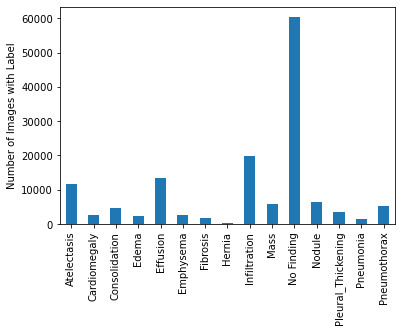

In [10]:
all_xray_df[all_labels].sum()/len(all_xray_df)
ax = all_xray_df[all_labels].sum().plot(kind='bar')
ax.set(ylabel = 'Number of Images with Label')

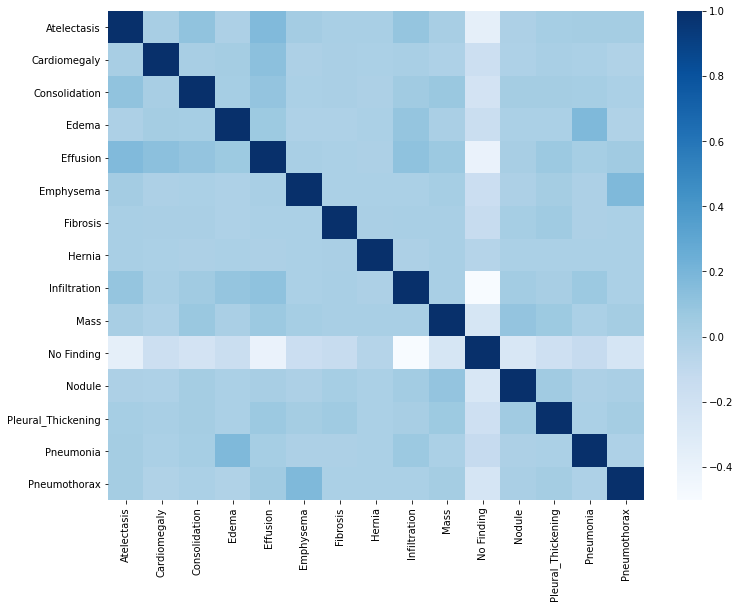

In [11]:
plt.figure(figsize=(12,9))
sns.heatmap(all_xray_df[all_labels].corr(), cmap='Blues')

Above, I see the relative frequencies of each disease in the dataset. 'No Finding' is the most common occurrence. 'No Finding' can never appear with any other label by definition, so we know that in 53.8% of this dataset, there is no finding in the image. Beyond that, it appears that 'Infiltration' is the most common disease-related label, and it is followed by 'Effusion' and 'Atelectasis.'
Since 'Infiltration' is the most common, I'm going to now look at how frequently it appears with all of the other diseases:

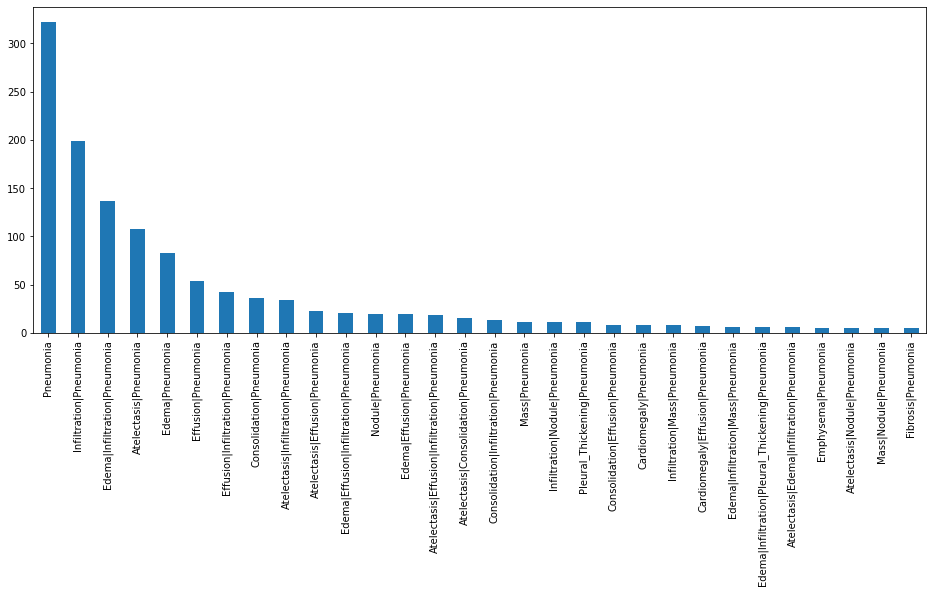

In [12]:
##Since there are many combinations of potential findings, I'm going to look at the 30 most common co-occurrences:
plt.figure(figsize=(16,6))
all_xray_df[all_xray_df.Pneumonia==1]['Finding Labels'].value_counts()[0:30].plot(kind='bar')

In [13]:
len(all_labels)

15

In [14]:
#Number of diseases per patient stored in column 'num_of_diseases'
all_diseases = all_labels.remove('No Finding')
all_xray_df['num_of_diseases'] = 0


for c_label in all_labels:
    all_xray_df['num_of_diseases'] = all_xray_df['num_of_diseases'] + all_xray_df[c_label]


In [15]:
all_xray_df.sort_values('num_of_diseases', ascending=False)

Image Index                                     Finding Labels  \
96044   00025262_000.png  Atelectasis|Consolidation|Edema|Effusion|Infil...   
83884   00020622_003.png  Atelectasis|Consolidation|Effusion|Fibrosis|In...   
81139   00019924_031.png  Atelectasis|Cardiomegaly|Consolidation|Edema|E...   
85685   00021130_003.png  Atelectasis|Effusion|Infiltration|Mass|Nodule|...   
37738   00009925_036.png  Consolidation|Effusion|Infiltration|Mass|Nodul...   
...                  ...                                                ...   
26518   00006957_000.png                                         No Finding   
66497   00016434_009.png                                         No Finding   
66498   00016434_010.png                                         No Finding   
26517   00006956_001.png                                         No Finding   
112119  00030805_000.png                                         No Finding   

        Follow-up #  Patient ID  Patient Age Patient Gender View Position  \
96044             0       25262           45              M            AP   
83884             3       20622           74              F            PA   
81139            31       19924           56              F            AP   
85685             3       21130           49              M            PA   
37738            36        9925           56              M            PA   
...             ...         ...          ...            ...           ...   
26518             0        6957           64              F            AP   
66497             9       16434           61              M            AP   
66498            10       16434           61              M            AP   
26517             1        6956           46              M            PA   
112119            0       30805           27              M            PA   

        OriginalImage[Width  Height]  OriginalImagePixelSpacing[x  ...  \
96044                  3056     2544                        0.139  ...   
83884                  2496     3024                        0.139  ...   
81139                  3056     2544                        0.139  ...   
85685                  2992     2991                        0.143  ...   
37738                  2992     2991                        0.143  ...   
...                     ...      ...                          ...  ...   
26518                  2500     2048                        0.171  ...   
66497                  2500     2048                        0.168  ...   
66498                  2500     2048                        0.168  ...   
26517                  2500     2048                        0.168  ...   
112119                 2048     2500                        0.171  ...   

        Fibrosis  Hernia  Infiltration  Mass  No Finding  Nodule  \
96044        0.0     0.0           1.0   1.0         0.0     1.0   
83884        1.0     0.0           1.0   1.0         0.0     1.0   
81139        0.0     0.0           1.0   1.0         0.0     1.0   
85685        0.0     0.0           1.0   1.0         0.0     1.0   
37738        0.0     0.0           1.0   1.0         0.0     1.0   
...          ...     ...           ...   ...         ...     ...   
26518        0.0     0.0           0.0   0.0         1.0     0.0   
66497        0.0     0.0           0.0   0.0         1.0     0.0   
66498        0.0     0.0           0.0   0.0         1.0     0.0   
26517        0.0     0.0           0.0   0.0         1.0     0.0   
112119       0.0     0.0           0.0   0.0         1.0     0.0   

        Pleural_Thickening  Pneumonia  Pneumothorax  num_of_diseases  
96044                  1.0        1.0           0.0              9.0  
83884                  1.0        0.0           1.0              9.0  
81139                  0.0        0.0           0.0              8.0  
85685                  1.0        0.0           1.0              7.0  
37738                  1.0        1.0           0.0              7.0  
...    

<ol> <h3>1. The patient demographic data such as gender, age, patient position,etc. (as it is available)</h3></ol>

In [16]:
#Remove rows with Patient age > 112(oldest man alive)
# Get names of indexes for which column Age has value >112
indexNames = all_xray_df[ all_xray_df['Patient Age'] > 112 ].index
# Delete these row indexes from dataFrame
all_xray_df.drop(indexNames , inplace=True)

In [17]:
all_xray_df


Image Index          Finding Labels  Follow-up #  Patient ID  \
0       00000001_000.png            Cardiomegaly            0           1   
1       00000001_001.png  Cardiomegaly|Emphysema            1           1   
2       00000001_002.png   Cardiomegaly|Effusion            2           1   
3       00000002_000.png              No Finding            0           2   
4       00000003_000.png                  Hernia            0           3   
...                  ...                     ...          ...         ...   
112115  00030801_001.png          Mass|Pneumonia            1       30801   
112116  00030802_000.png              No Finding            0       30802   
112117  00030803_000.png              No Finding            0       30803   
112118  00030804_000.png              No Finding            0       30804   
112119  00030805_000.png              No Finding            0       30805   

        Patient Age Patient Gender View Position  OriginalImage[Width  \
0                58              M            PA                 2682   
1                58              M            PA                 2894   
2                58              M            PA                 2500   
3                81              M            PA                 2500   
4                81              F            PA                 2582   
...             ...            ...           ...                  ...   
112115           39              M            PA                 2048   
112116           29              M            PA                 2048   
112117           42              F            PA                 2048   
112118           30              F            PA                 2048   
112119           27              M            PA                 2048   

        Height]  OriginalImagePixelSpacing[x  ...  Fibrosis  Hernia  \
0          2749                        0.143  ...       0.0     0.0   
1          2729                        0.143  ...       0.0     0.0   
2          2048                        0.168  ...       0.0     0.0   
3          2048                        0.171  ...       0.0     0.0   
4          2991                        0.143  ...       0.0     1.0   
...         ...                          ...  ...       ...     ...   
112115     2500                        0.168  ...       0.0     0.0   
112116     2500                        0.168  ...       0.0     0.0   
112117     2500                        0.168  ...       0.0     0.0   
112118     2500                        0.168  ...       0.0     0.0   
112119     2500                        0.171  ...       0.0     0.0   

        Infiltration  Mass  No Finding  Nodule  Pleural_Thickening  Pneumonia  \
0                0.0   0.0         0.0     0.0                 0.0        0.0   
1                0.0   0.0         0.0     0.0                 0.0        0.0   
2                0.0   0.0         0.0     0.0                 0.0        0.0   
3                0.0   0.0         1.0     0.0                 0.0        0.0   
4                0.0   0.0         0.0     0.0                 0.0        0.0   
...              ...   ...         ...     ...                 ...        ...   
112115           0.0   1.0         0.0     0.0                 0.0        1.0   
112116           0.0   0.0         1.0     0.0                 0.0        0.0   
112117           0.0   0.0         1.0     0.0                 0.0        0.0   
112118           0.0   0.0         1.0     0.0                 0.0        0.0   
112119           0.0   0.0         1.0     0.0                 0.0        0.0   

        Pneumothorax  num_of_diseases  
0                0.0              1.0  
1                0.0              2.0  
2                0.0              2.0  
3                0.0              0.0  
4                0.0              1.0  
...              ...              ...  
112115           0.0              2.0  
112116           0.0              0.0  
112117           0.0     

In [18]:
#Earlier : 112120 rows
#Now : 112104 rows
# 16 rows were deleted because ages were above 112 which is not possible

(array([ 1803.,  5021., 12798., 14580., 18664., 26481., 20790.,  9793.,
         1917.,   257.]),
 array([ 1. , 10.4, 19.8, 29.2, 38.6, 48. , 57.4, 66.8, 76.2, 85.6, 95. ]),
 <a list of 10 Patch objects>)

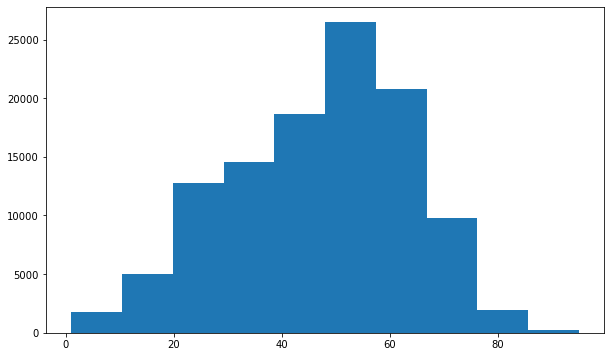

In [19]:
plt.figure(figsize=(10,6))
plt.hist(all_xray_df['Patient Age'])

(array([ 41.,  85., 174., 203., 196., 243., 266., 175.,  39.,   8.]),
 array([ 2. , 10.8, 19.6, 28.4, 37.2, 46. , 54.8, 63.6, 72.4, 81.2, 90. ]),
 <a list of 10 Patch objects>)

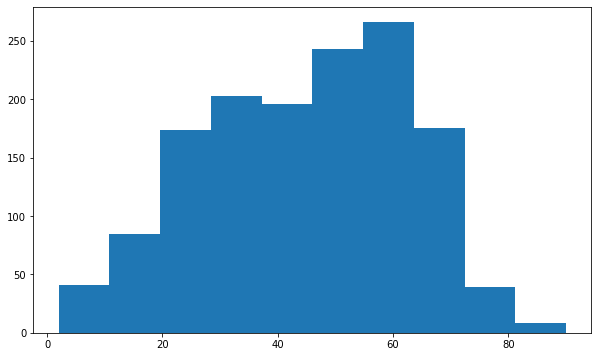

In [20]:
plt.figure(figsize=(10,6))
plt.hist(all_xray_df[all_xray_df.Pneumonia==1]['Patient Age'])

Peak between 54.8, 63.6

(array([ 1762.,  4936., 12608., 14366., 18454., 26188., 20532.,  9678.,
         1895.,   255.]),
 array([ 1. , 10.4, 19.8, 29.2, 38.6, 48. , 57.4, 66.8, 76.2, 85.6, 95. ]),
 <a list of 10 Patch objects>)

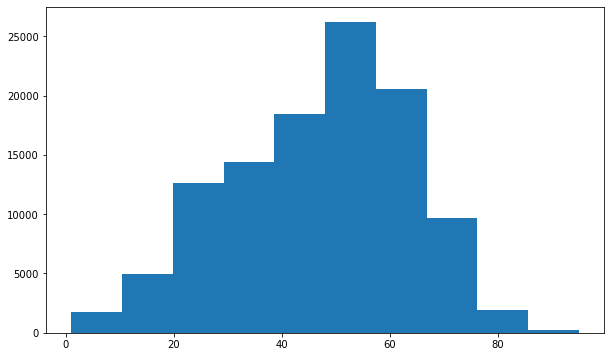

In [21]:
plt.figure(figsize=(10,6))
plt.hist(all_xray_df[all_xray_df.Pneumonia==0]['Patient Age'])

#Peak at 48

(array([ 429.,  929., 2215., 2866., 3298., 3979., 4015., 1698.,  405.,
          57.]),
 array([ 1. , 10.3, 19.6, 28.9, 38.2, 47.5, 56.8, 66.1, 75.4, 84.7, 94. ]),
 <a list of 10 Patch objects>)

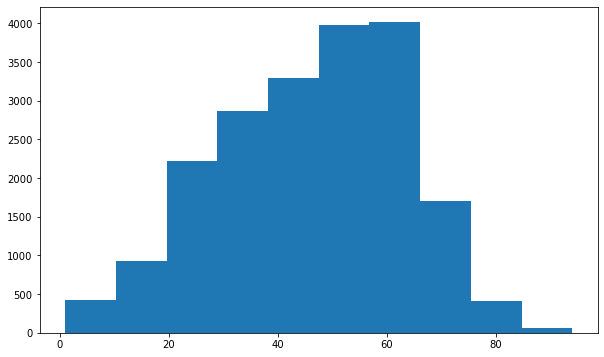

In [22]:
plt.figure(figsize=(10,6))
plt.hist(all_xray_df[all_xray_df.Infiltration==1]['Patient Age'])

(array([ 13.,  44.,  76.,  85.,  82.,  92., 107.,  90.,  15.,   1.]),
 array([ 2. , 10.8, 19.6, 28.4, 37.2, 46. , 54.8, 63.6, 72.4, 81.2, 90. ]),
 <a list of 10 Patch objects>)

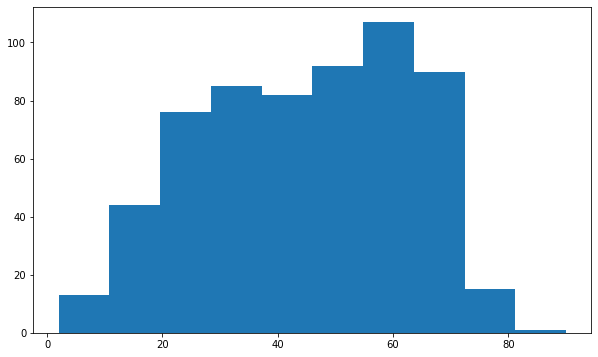

In [23]:
#Viewing age distribution for Infiltration & Pneumonia, the most common comorbidity 
plt.figure(figsize=(10,6))
plt.hist(all_xray_df.query('Infiltration == 1 & Pneumonia ==1')['Patient Age'])

In [24]:
#Checking for unique patient IDs
len(all_xray_df['Patient ID'].unique())

30802

In [25]:
#Out of 112104 entries 30802 are unique entries --> having unqiue patient IDs

In [26]:
len(all_xray_df[all_xray_df.Pneumonia==1]['Patient ID'].unique())

1008

Out of 30802 patients, 1008 have pneumonia 

<ol> <h3>2. The x-ray views taken (i.e. view position)

(array([800.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 630.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

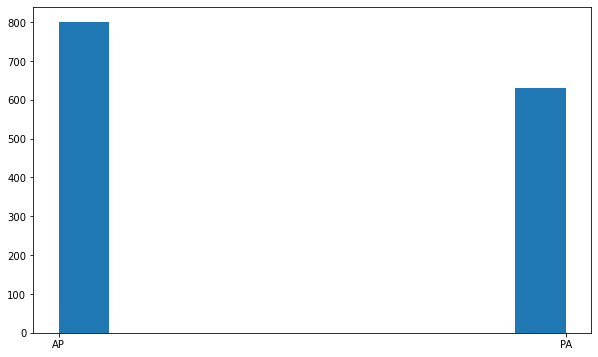

In [27]:
plt.figure(figsize=(10,6))
plt.hist(all_xray_df[all_xray_df.Pneumonia==1]['View Position'])

(array([67299.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 44805.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

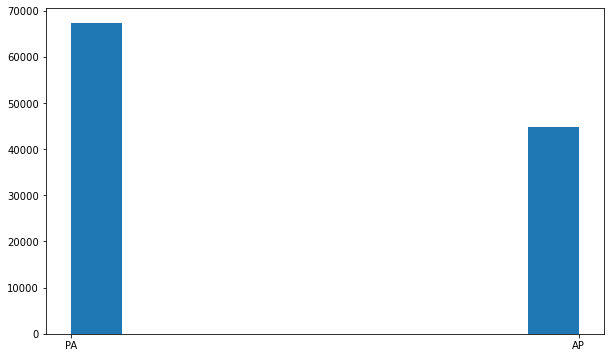

In [28]:
plt.figure(figsize=(10,6))
plt.hist(all_xray_df['View Position'])

In [29]:
#View Position distribution in Dataset
all_xray_df['View Position'].value_counts()

PA    67299
AP    44805
Name: View Position, dtype: int64

In [30]:
#View Position distribution in Pneumonia Patients
all_xray_df[all_xray_df.Pneumonia==1]['View Position'].value_counts()

AP    800
PA    630
Name: View Position, dtype: int64

In [31]:
(67299 - 44805)/44805

0.5020421827920991

As we see, in the overall dataset, the PA views are more by 50%
But, in pneumonia patients the AP views are more by 63%

In [32]:
#Total number of pneumonia cases
all_xray_df[ all_xray_df['Pneumonia'] == 1 ].count()

Image Index                    1430
Finding Labels                 1430
Follow-up #                    1430
Patient ID                     1430
Patient Age                    1430
Patient Gender                 1430
View Position                  1430
OriginalImage[Width            1430
Height]                        1430
OriginalImagePixelSpacing[x    1430
y]                             1430
Unnamed: 11                       0
Atelectasis                    1430
Cardiomegaly                   1430
Consolidation                  1430
Edema                          1430
Effusion                       1430
Emphysema                      1430
Fibrosis                       1430
Hernia                         1430
Infiltration                   1430
Mass                           1430
No Finding                     1430
Nodule                         1430
Pleural_Thickening             1430
Pneumonia                      1430
Pneumothorax                   1430
num_of_diseases             

<h3>Pixel-level assessments of the imaging data for healthy & disease states of interest (e.g. histograms of intensity values) and compare distributions across diseases.

In [33]:

sample_df

Image Index                                     Finding Labels  \
0     00000013_005.png  Emphysema|Infiltration|Pleural_Thickening|Pneu...   
1     00000013_026.png                             Cardiomegaly|Emphysema   
2     00000017_001.png                                         No Finding   
3     00000030_001.png                                        Atelectasis   
4     00000032_001.png                        Cardiomegaly|Edema|Effusion   
...                ...                                                ...   
5601  00030712_000.png                                         No Finding   
5602  00030786_005.png                    Cardiomegaly|Effusion|Emphysema   
5603  00030789_000.png                                       Infiltration   
5604  00030792_000.png                                         No Finding   
5605  00030797_000.png                                         No Finding   

      Follow-up #  Patient ID Patient Age Patient Gender View Position  \
0               5          13        060Y              M            AP   
1              26          13        057Y              M            AP   
2               1          17        077Y              M            AP   
3               1          30        079Y              M            PA   
4               1          32        055Y              F            AP   
...           ...         ...         ...            ...           ...   
5601            0       30712        058Y              M            PA   
5602            5       30786        061Y              F            AP   
5603            0       30789        052Y              F            PA   
5604            0       30792        010Y              F            PA   
5605            0       30797        024Y              M            PA   

      OriginalImageWidth  OriginalImageHeight  OriginalImagePixelSpacing_x  \
0                   3056                 2544                     0.139000   
1                   2500                 2048                     0.168000   
2                   2500                 2048                     0.168000   
3                   2992                 2991                     0.143000   
4                   2500                 2048                     0.168000   
...                  ...                  ...                          ...   
5601                2021                 2021                     0.194311   
5602                3056                 2544                     0.139000   
5603                2021                 2021                     0.194311   
5604                1775                 1712                     0.194311   
5605                2021                 2021                     0.194311   

      OriginalImagePixelSpacing_y  
0                        0.139000  
1                        0.168000  
2                        0.168000  
3                        0.143000  
4                        0.168000  
...                           ...  
5601                     0.194311  
5602                     0.139000  
5603                     0.194311  
5604                     0.194311  
5605                     0.194311  

[5606 rows x 11 columns]

In [34]:
img_list = !ls /data/images_001/images |sort -R |tail -20 
img_list


['00000197_003.png',
 '00000571_000.png',
 '00000694_000.png',
 '00000250_008.png',
 '00000926_002.png',
 '00000659_000.png',
 '00000073_008.png',
 '00000697_001.png',
 '00000693_005.png',
 '00001129_002.png',
 '00001323_001.png',
 '00000831_003.png',
 '00000468_034.png',
 '00000697_004.png',
 '00000499_003.png',
 '00000344_002.png',
 '00000731_001.png',
 '00001301_029.png',
 '00000163_001.png',
 '00000783_001.png']

In [51]:
all_xray_df = pd.read_csv('/data/Data_Entry_2017.csv')
all_image_paths = {os.path.basename(x): x for x in 
                   glob(os.path.join('/data','images*', '*', '*.png'))}
print('Scans found:', len(all_image_paths), ', Total Headers', all_xray_df.shape[0])
all_xray_df['path'] = all_xray_df['Image Index'].map(all_image_paths.get)
all_xray_df.sample(3)

Scans found: 112120 , Total Headers 112120


Image Index                            Finding Labels  \
57907  00014346_006.png  Consolidation|Effusion|Mass|Pneumothorax   
31074  00008072_000.png                               Atelectasis   
82142  00020213_002.png                     Effusion|Infiltration   

       Follow-up #  Patient ID  Patient Age Patient Gender View Position  \
57907            6       14346           24              F            PA   
31074            0        8072           48              F            PA   
82142            2       20213           72              F            AP   

       OriginalImage[Width  Height]  OriginalImagePixelSpacing[x        y]  \
57907                 2021     2021                     0.194311  0.194311   
31074                 2048     2500                     0.168000  0.168000   
82142                 3056     2544                     0.139000  0.139000   

       Unnamed: 11                                      path  
57907          NaN  /data/images_007/images/00014346_006.png  
31074          NaN  /data/images_004/images/00008072_000.png  
82142          NaN  /data/images_009/images/00020213_002.png

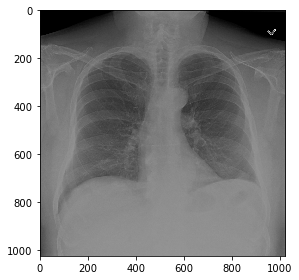

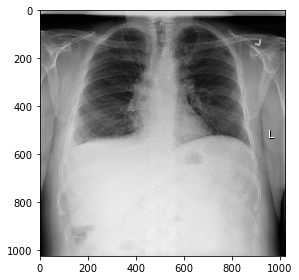

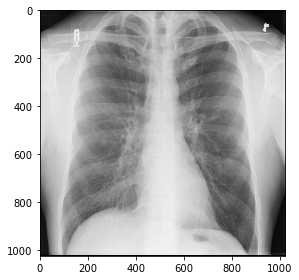

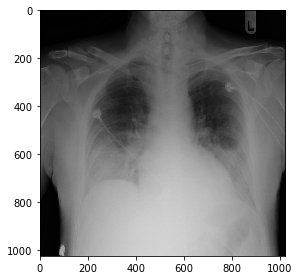

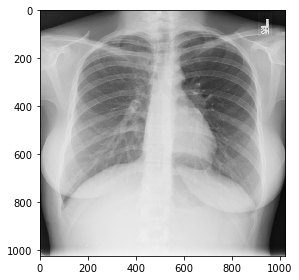

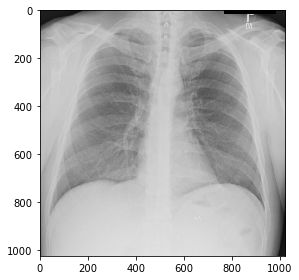

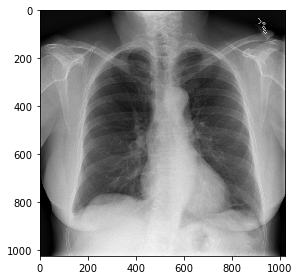

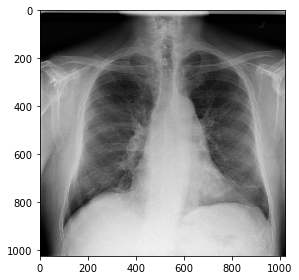

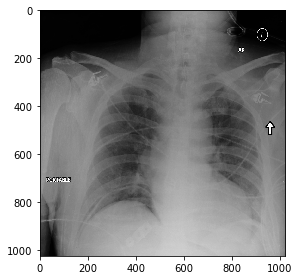

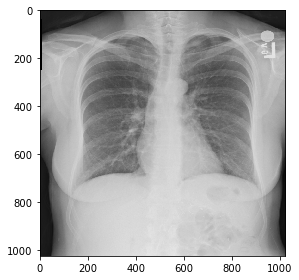

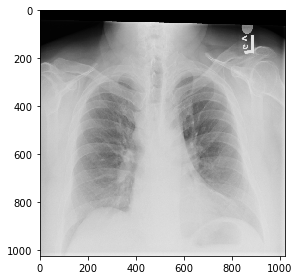

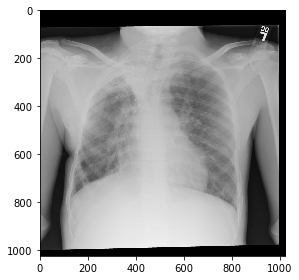

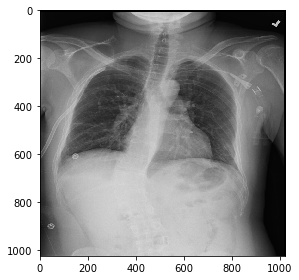

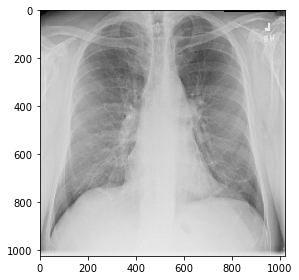

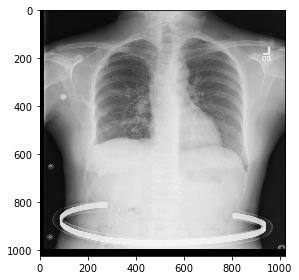

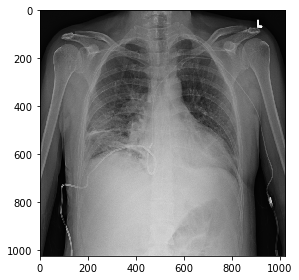

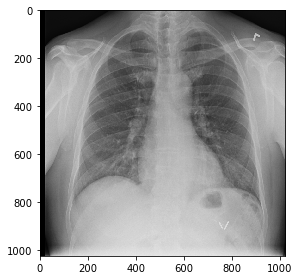

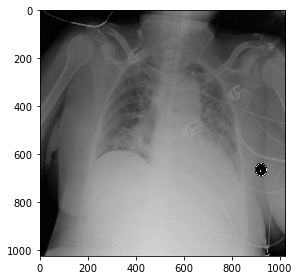

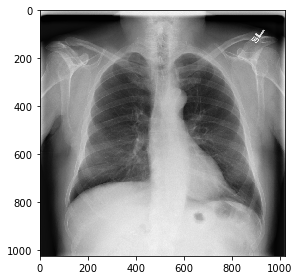

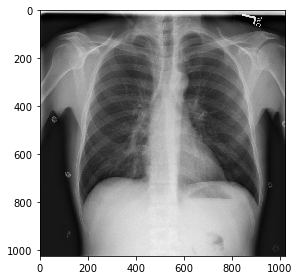

In [35]:
from skimage.io import imshow
from skimage.io import imread
for img in img_list:
    imr = imread(f'/data/images_001/images/{img}')
    imshow(imr, cmap='gray')
    plt.show()

In [36]:
dcoms = !ls | grep .dcm
dcoms

['test1.dcm', 'test2.dcm', 'test3.dcm', 'test4.dcm', 'test5.dcm', 'test6.dcm']

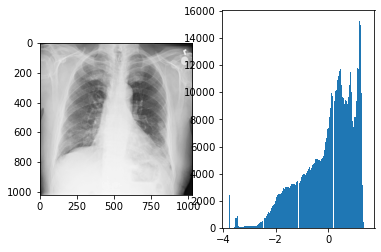

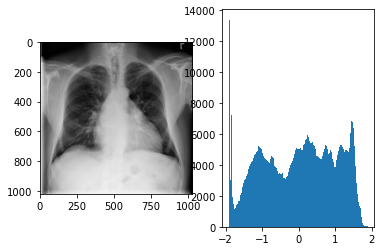

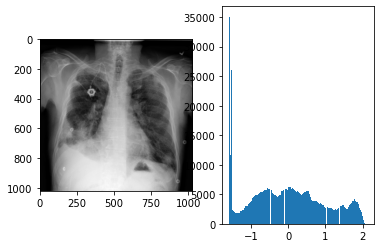

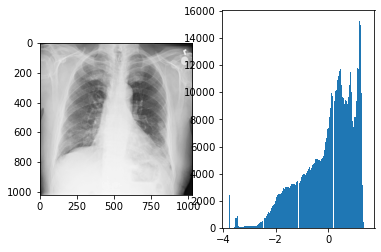

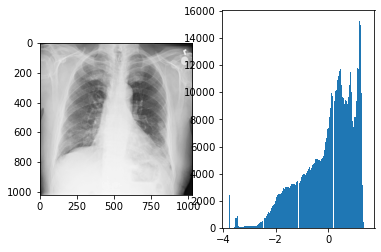

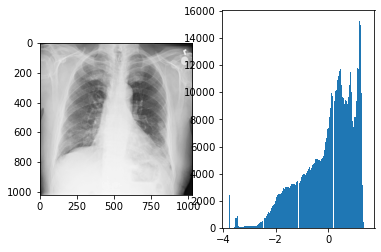

In [37]:
#To View intensity distributions
import pydicom 
for dcom in dcoms:
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
    dcm = pydicom.dcmread(dcom)
    img = (dcm.pixel_array - np.mean(dcm.pixel_array))/np.std(dcm.pixel_array)
    ax1.imshow(dcm.pixel_array,cmap='gray')
    ax2.hist(img.ravel(), bins = 256)
    plt.show()

In [38]:
data_sample_path = {os.path.basename(x): x for x in 
                   glob(os.path.join('/data','images*','*','*.png'))}
sample_df['path'] = sample_df['Image Index'].map(data_sample_path.get)
sample_df.head()

Image Index                                     Finding Labels  \
0  00000013_005.png  Emphysema|Infiltration|Pleural_Thickening|Pneu...   
1  00000013_026.png                             Cardiomegaly|Emphysema   
2  00000017_001.png                                         No Finding   
3  00000030_001.png                                        Atelectasis   
4  00000032_001.png                        Cardiomegaly|Edema|Effusion   

   Follow-up #  Patient ID Patient Age Patient Gender View Position  \
0            5          13        060Y              M            AP   
1           26          13        057Y              M            AP   
2            1          17        077Y              M            AP   
3            1          30        079Y              M            PA   
4            1          32        055Y              F            AP   

   OriginalImageWidth  OriginalImageHeight  OriginalImagePixelSpacing_x  \
0                3056                 2544                        0.139   
1                2500                 2048                        0.168   
2                2500                 2048                        0.168   
3                2992                 2991                        0.143   
4                2500                 2048                        0.168   

   OriginalImagePixelSpacing_y                                      path  
0                        0.139  /data/images_001/images/00000013_005.png  
1                        0.168  /data/images_001/images/00000013_026.png  
2                        0.168  /data/images_001/images/00000017_001.png  
3                        0.143  /data/images_001/images/00000030_001.png  
4                        0.168  /data/images_001/images/00000032_001.png

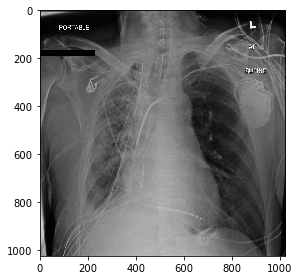

In [39]:
imshow(sample_df['path'][0])

Spliting based on diseases in dataset

In [40]:
sample_all_labels = list(set(list(chain.from_iterable([i.split('|') for i in sample_df['Finding Labels']]))))

for c_label in sample_all_labels:
    sample_df[c_label] = sample_df['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
sample_df.head()

Image Index                                     Finding Labels  \
0  00000013_005.png  Emphysema|Infiltration|Pleural_Thickening|Pneu...   
1  00000013_026.png                             Cardiomegaly|Emphysema   
2  00000017_001.png                                         No Finding   
3  00000030_001.png                                        Atelectasis   
4  00000032_001.png                        Cardiomegaly|Edema|Effusion   

   Follow-up #  Patient ID Patient Age Patient Gender View Position  \
0            5          13        060Y              M            AP   
1           26          13        057Y              M            AP   
2            1          17        077Y              M            AP   
3            1          30        079Y              M            PA   
4            1          32        055Y              F            AP   

   OriginalImageWidth  OriginalImageHeight  OriginalImagePixelSpacing_x  ...  \
0                3056                 2544                        0.139  ...   
1                2500                 2048                        0.168  ...   
2                2500                 2048                        0.168  ...   
3                2992                 2991                        0.143  ...   
4                2500                 2048                        0.168  ...   

   Cardiomegaly Mass  Effusion  Pneumonia  Hernia  Nodule  Infiltration  \
0           0.0  0.0       0.0        0.0     0.0     0.0           1.0   
1           1.0  0.0       0.0        0.0     0.0     0.0           0.0   
2           0.0  0.0       0.0        0.0     0.0     0.0           0.0   
3           0.0  0.0       0.0        0.0     0.0     0.0           0.0   
4           1.0  0.0       1.0        0.0     0.0     0.0           0.0   

   Pneumothorax  Fibrosis  Edema  
0           1.0       0.0    0.0  
1           0.0       0.0    0.0  
2           0.0       0.0    0.0  
3           0.0       0.0    0.0  
4           0.0       0.0    1.0  

[5 rows x 27 columns]

Analysing Pneumonia Images

In [41]:
sample_df_pneumonia = sample_df[sample_df['Pneumonia'] == 1]

In [53]:
import sys

Pneumonia Images and their pixel distribution

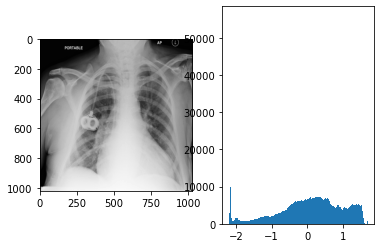

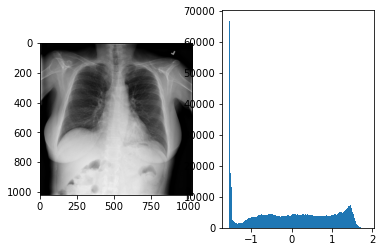

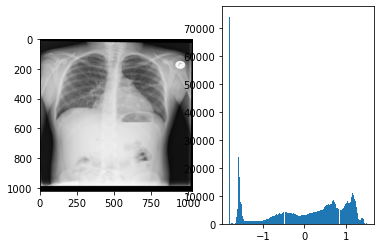

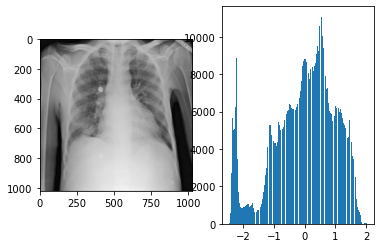

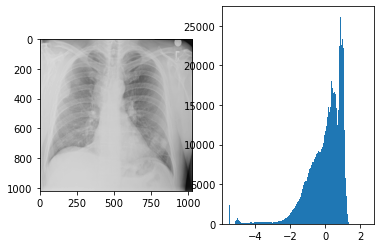

In [56]:
import imageio
for png in sample_df_pneumonia .head(5)['path']:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    img = imageio.imread(png)
    ax1.imshow(img, cmap='gray')
    img = (img-np.mean(img)) / np.std(img)
    ax2.hist(img.ravel(), bins = 256)
    plt.show()


Comparing it with pixel distribution of non-pneumonia images

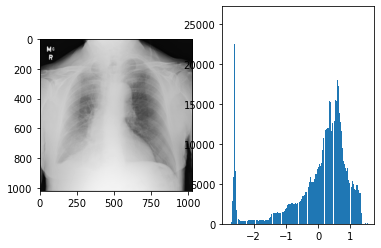

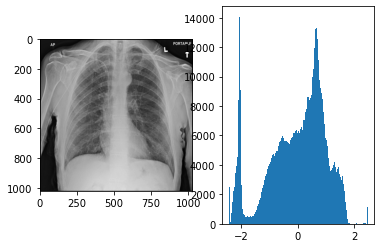

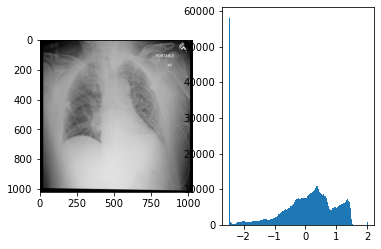

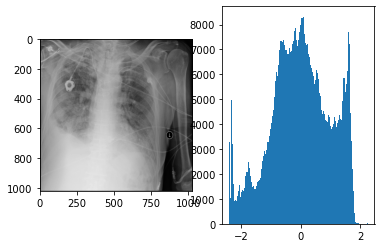

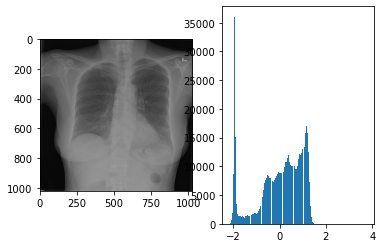

In [58]:
sample_df_non_pneumonia = sample_df[sample_df['No Finding'] == 1]

for png in sample_df_non_pneumonia.head(5)['path']:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    img = imageio.imread(png)
    ax1.imshow(img, cmap='gray')
    img = (img-np.mean(img)) / np.std(img)
    ax2.hist(img.ravel(), bins = 256)
    plt.show()

Comparing intensity distribution graphs of pneumonia vs non-pneumonia

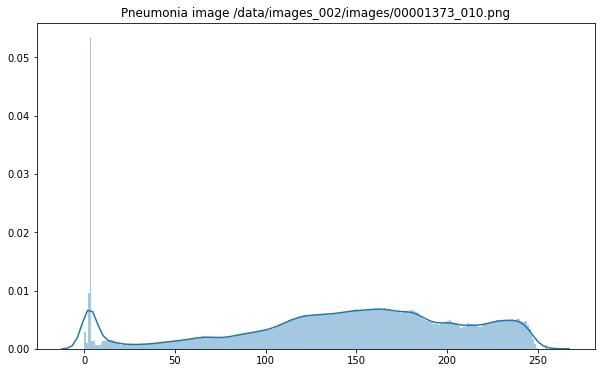

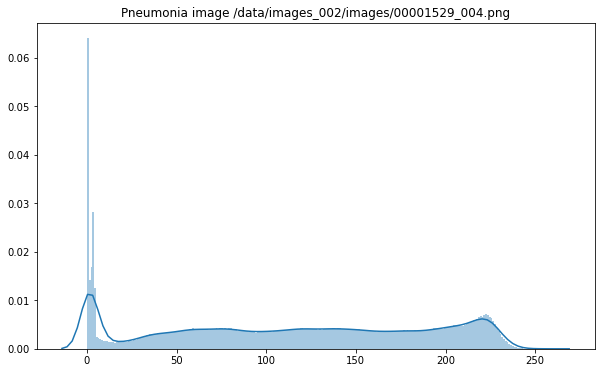

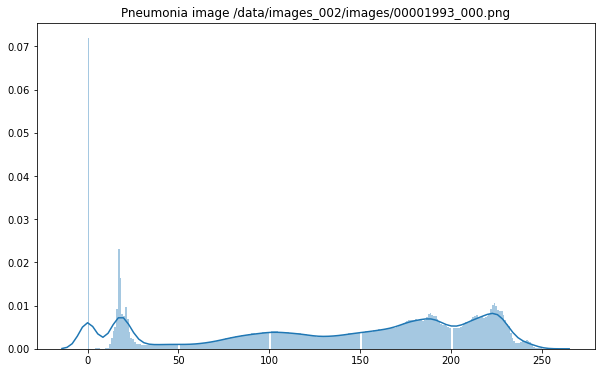

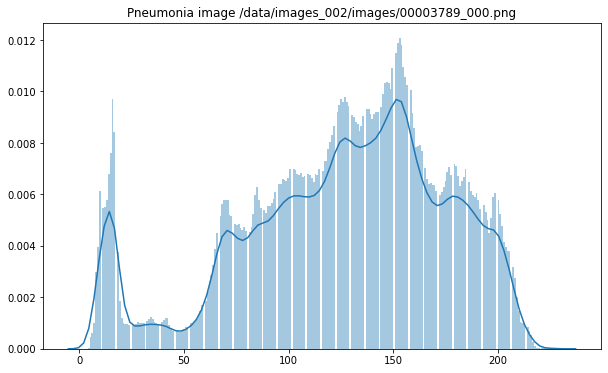

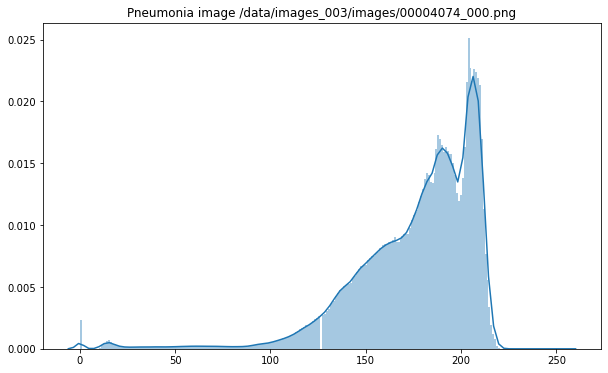

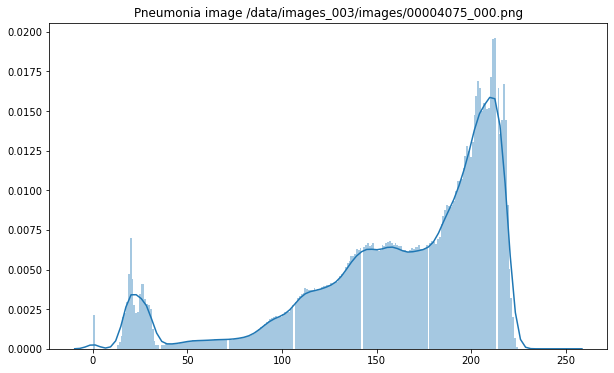

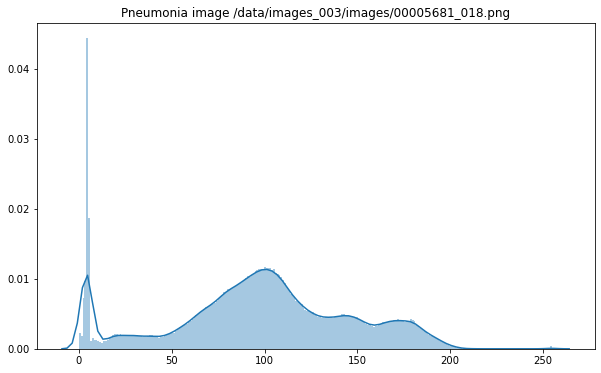

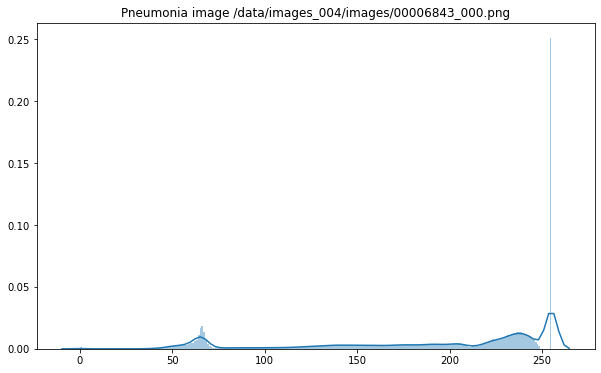

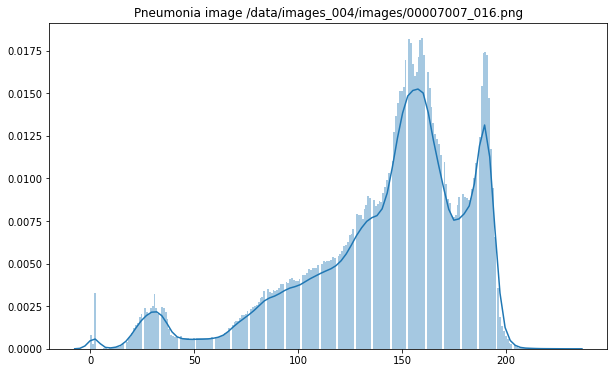

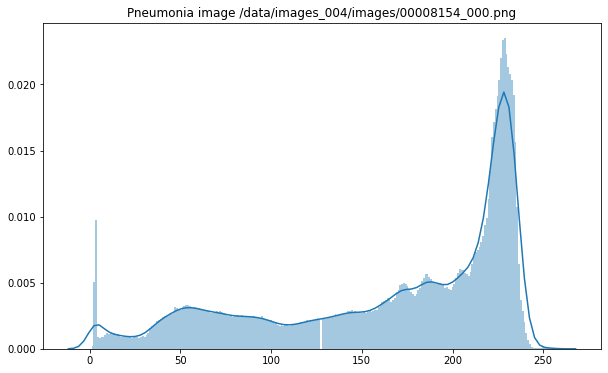

In [61]:
# Pneumonia
for png in sample_df_pneumonia.head(10)['path']:
    plt.figure(figsize=(10,6))
    img = imageio.imread(png)
    sns.distplot(img, bins=256, kde=True, rug=False)
    plt.title(f'Pneumonia image {png}')
    plt.show()

Observation: In Pneumonia images pixel intensity peaks are generally between 200-250

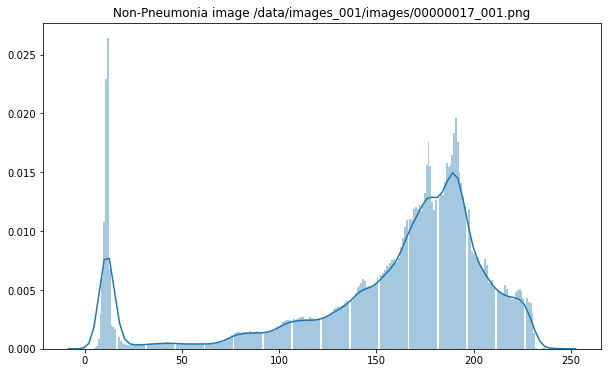

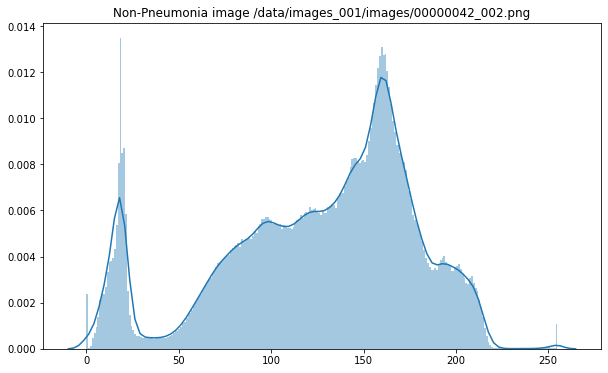

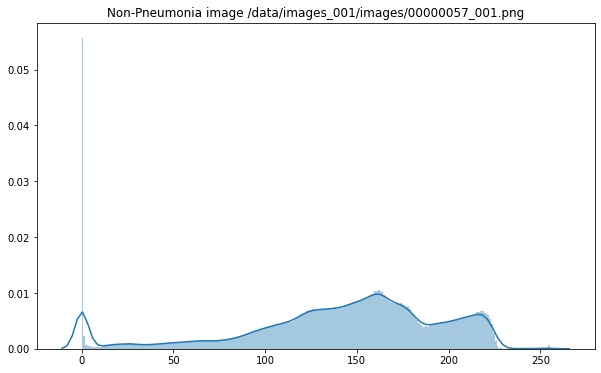

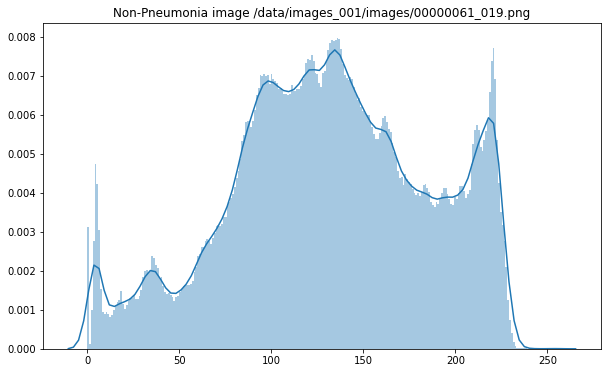

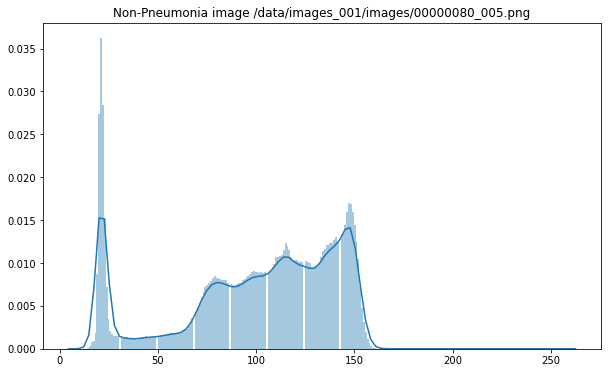

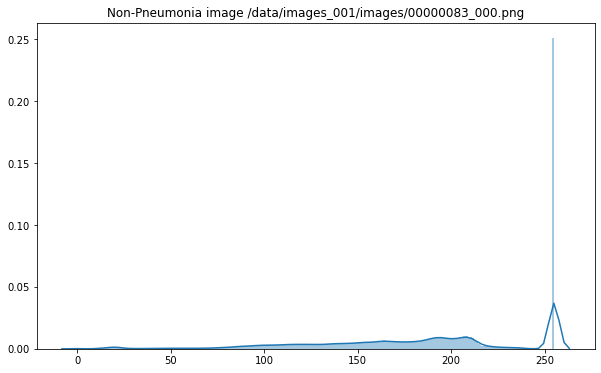

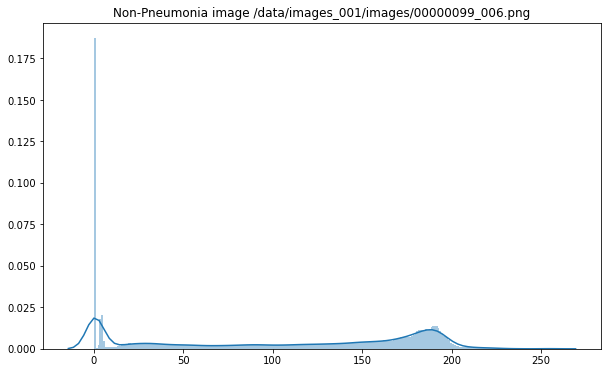

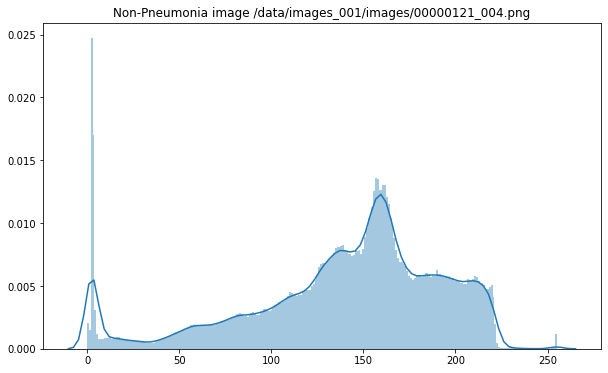

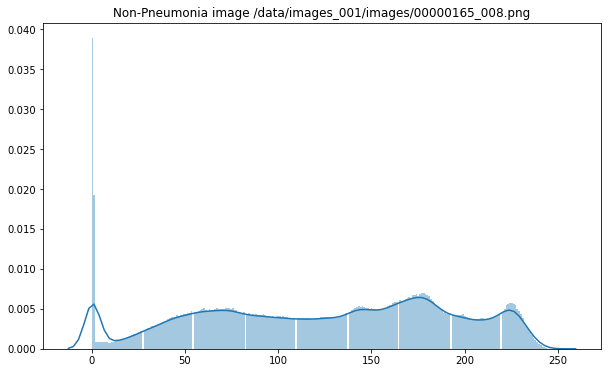

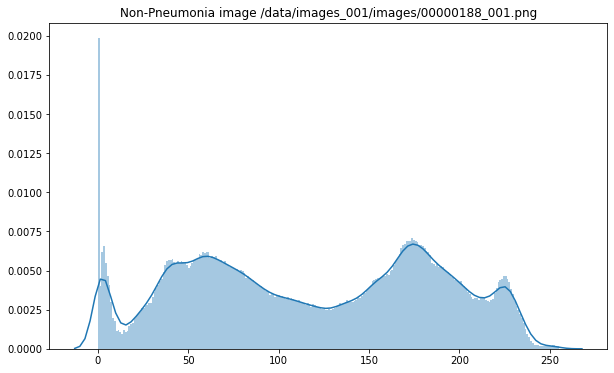

In [65]:
# Non=Pneumonia Images 

for png in sample_df_non_pneumonia.head(10)['path']:
    plt.figure(figsize=(10,6))
    img = imageio.imread(png)
    sns.distplot(img, bins=256, kde=True, rug=False)
    plt.title(f'Non-Pneumonia image {png}')
    plt.show()

Observation in non=pneumonia: No peaks between 200-250

After comparing the pixel internsity distributions, the peak from values 0 to 40 represent black color, which is mainly the boundary/ackground color in the X-Rays.
Actual representation of the chest images, are more toward white/grayish color (lighter tones).
To remove black boundaries - I will remove the values from 0-40 and focus more on the lighter pixels


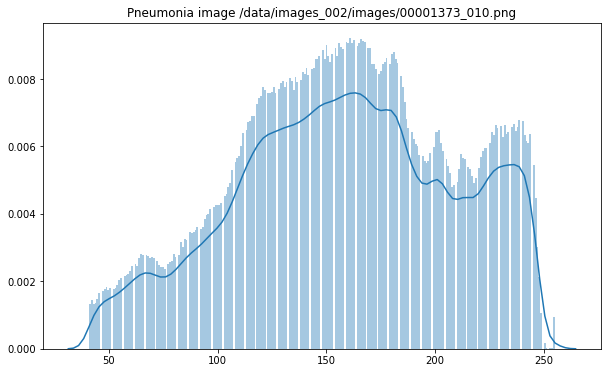

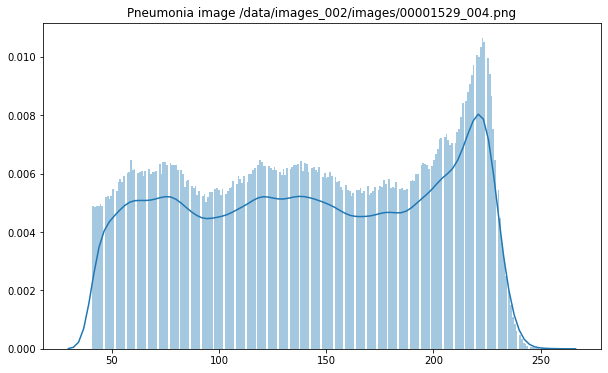

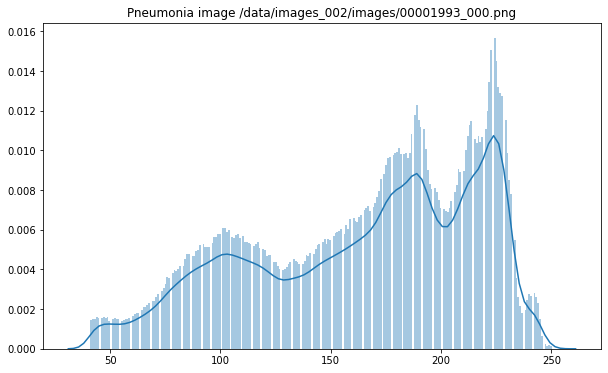

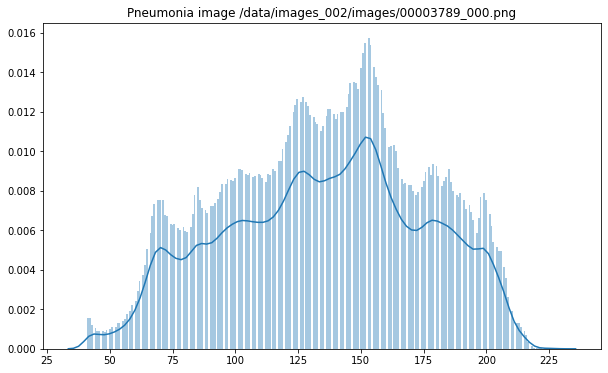

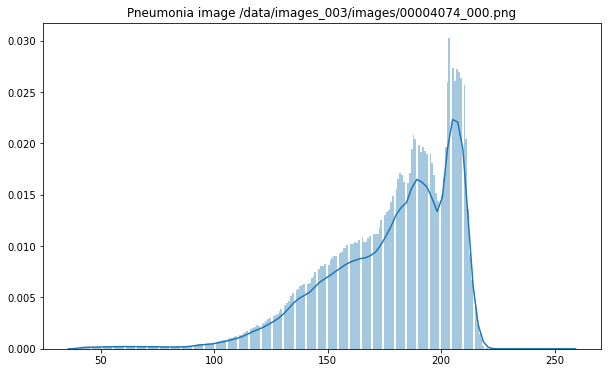

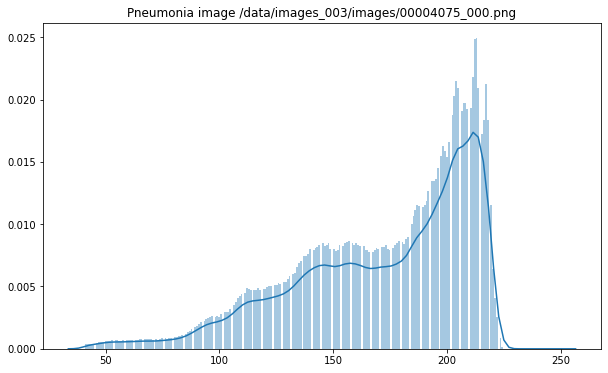

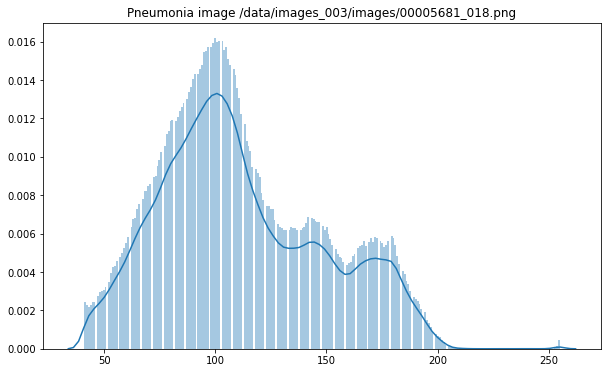

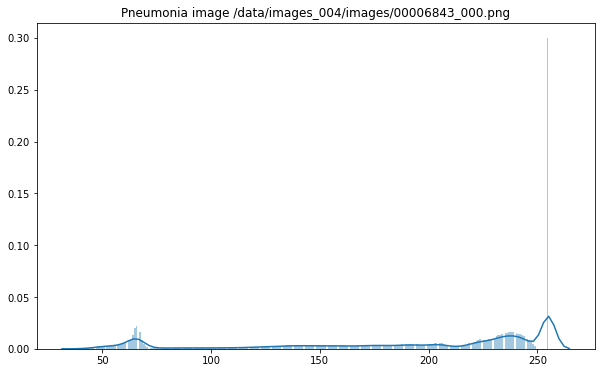

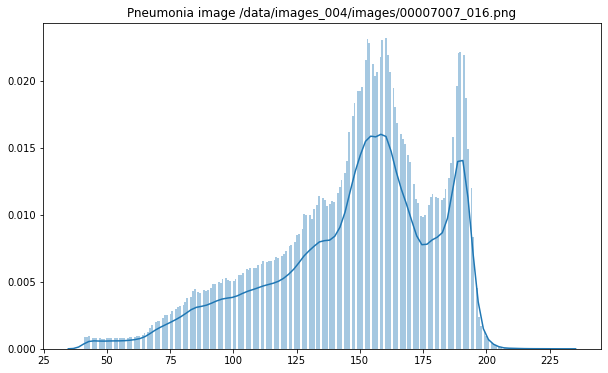

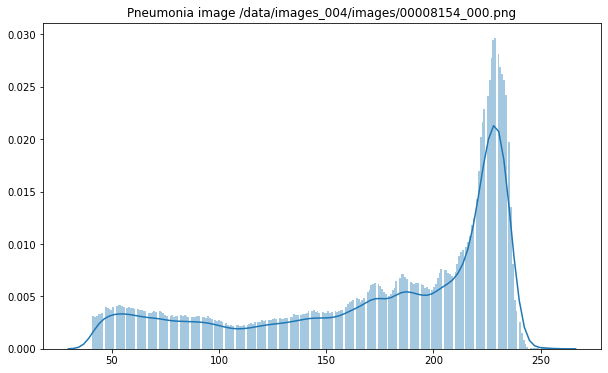

In [68]:
for png in sample_df_pneumonia.head(10)['path']:
    plt.figure(figsize=(10,6))
    img = imageio.imread(png)
    img = img[img > 40]
    sns.distplot(img, bins=256, kde=True, rug=False)
    plt.title(f'Pneumonia image {png}')
    plt.show()

Doing the same for non-pneumonia images

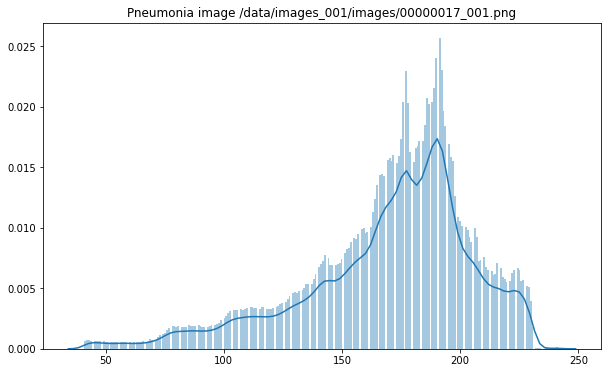

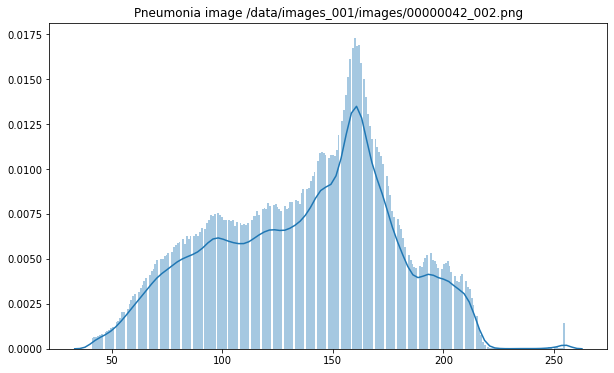

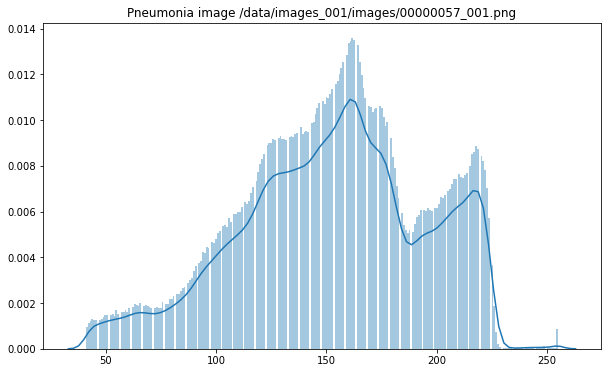

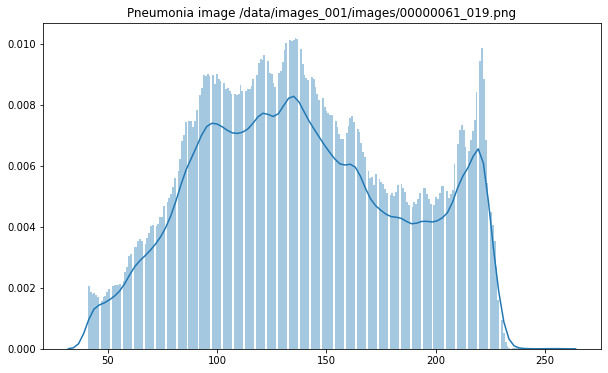

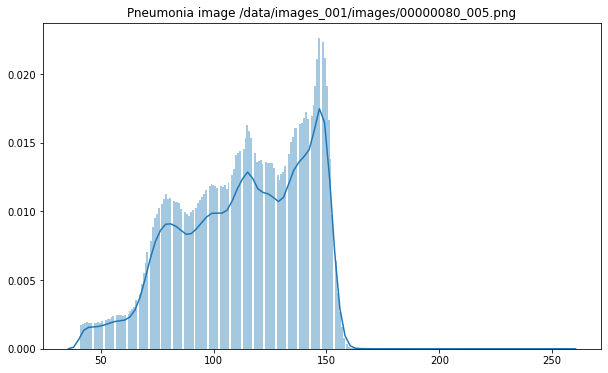

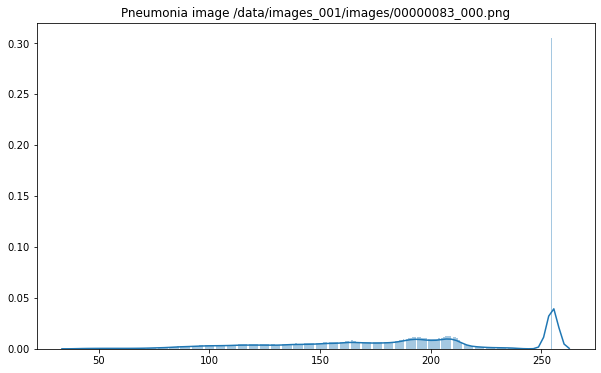

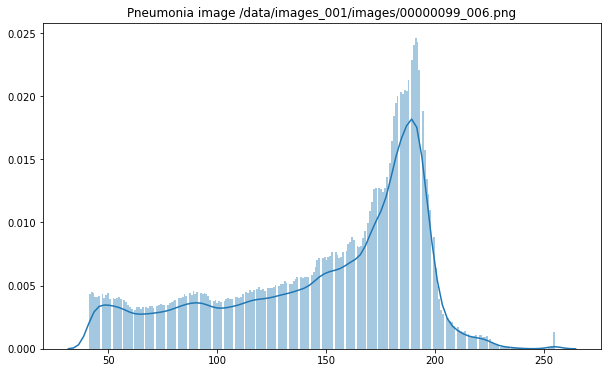

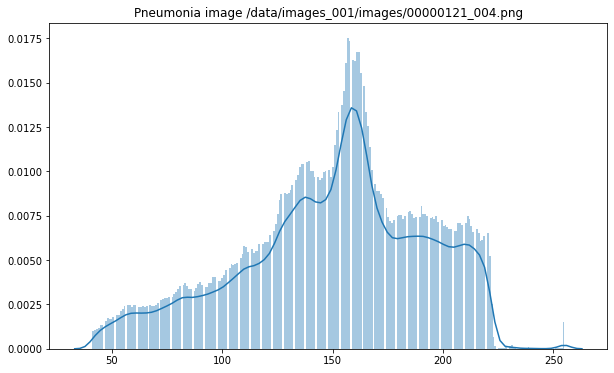

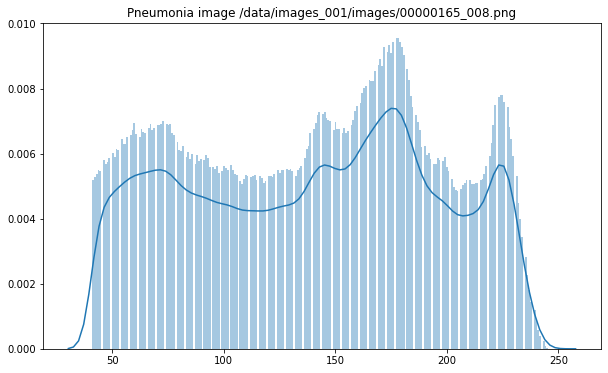

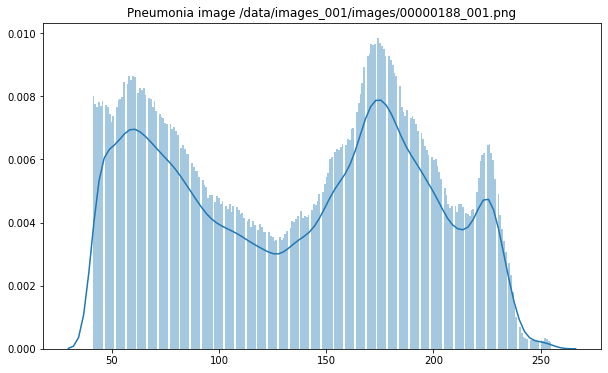

In [70]:
for png in sample_df_non_pneumonia.head(10)['path']:
    plt.figure(figsize=(10,6))
    img = imageio.imread(png)
    img = img[img > 40]
    sns.distplot(img, bins=256, kde=True, rug=False)
    plt.title(f'Pneumonia image {png}')
    plt.show()

Pixel Intensity Distribution Analysis for Diseases
Now let's examine the similarity and differences between Pneumonia and other diseases
Will do this for 5 groups, picking one picture for each diseas as representation and then plot them.

In [71]:
coll = []
for i in range(5):
    l = {}
    for label in all_labels:
        l[label] = sample_df[sample_df[label] == 1]['path'].iloc[i]
    coll.append(l)

In [72]:
coll[0]

{'Atelectasis': '/data/images_001/images/00000030_001.png',
 'Cardiomegaly': '/data/images_001/images/00000013_026.png',
 'Consolidation': '/data/images_001/images/00000040_003.png',
 'Edema': '/data/images_001/images/00000032_001.png',
 'Effusion': '/data/images_001/images/00000032_001.png',
 'Emphysema': '/data/images_001/images/00000013_005.png',
 'Fibrosis': '/data/images_001/images/00000181_001.png',
 'Hernia': '/data/images_004/images/00006624_002.png',
 'Infiltration': '/data/images_001/images/00000013_005.png',
 'Mass': '/data/images_001/images/00000040_003.png',
 'Nodule': '/data/images_001/images/00000061_025.png',
 'Pleural_Thickening': '/data/images_001/images/00000013_005.png',
 'Pneumonia': '/data/images_002/images/00001373_010.png',
 'Pneumothorax': '/data/images_001/images/00000013_005.png'}

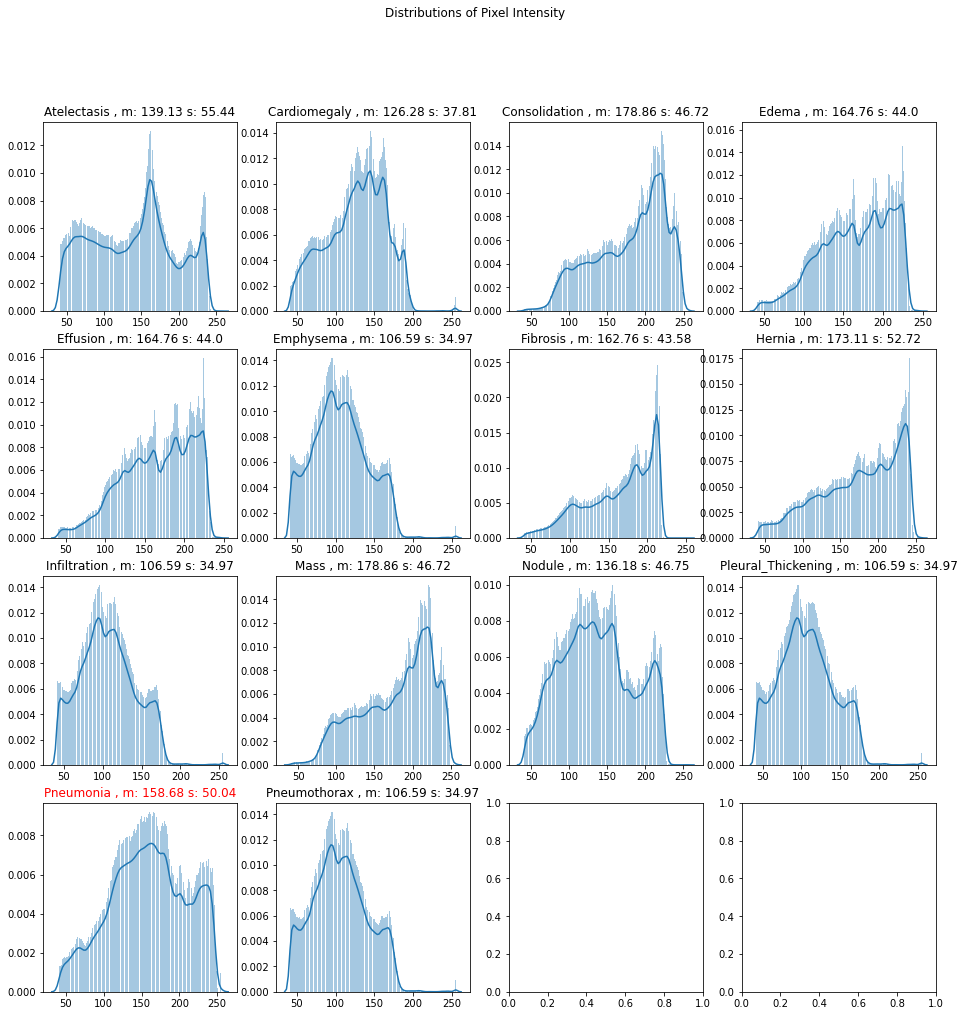

In [75]:
difference = {}
fig, axes = plt.subplots(4, 4, figsize = (16, 16))
fig.suptitle('Distributions of Pixel Intensity')
p = imageio.imread(coll[0]['Pneumonia'])
p = p[p > 40]
pneumonia = np.array(p.ravel())
for ax, label, path in zip(axes.flatten(), coll[0].keys(), coll[0].values()):
    img2 = imageio.imread(path)
    img2 = img2[img2 > 40]
    img2 = img2.ravel()
    sns.distplot(img2, ax=ax, bins=256)
#     diff = abs(pneumonia_arr-np.array(img2)).sum()
#     difference[label] = diff
#     ax.set(title=f'{label} - {diff}')
    if label == 'Pneumonia':
        ax.set_title(f'{label} , m: {round(img2.mean(),2)} s: {round(img2.std(),2)}', color="red")
    else:
        ax.set_title(f'{label} , m: {round(img2.mean(),2)} s: {round(img2.std(),2)}')

Examinig above, the closest three diseases in terms of shape, mean and std (spread), is Edeam, Mass and nodule

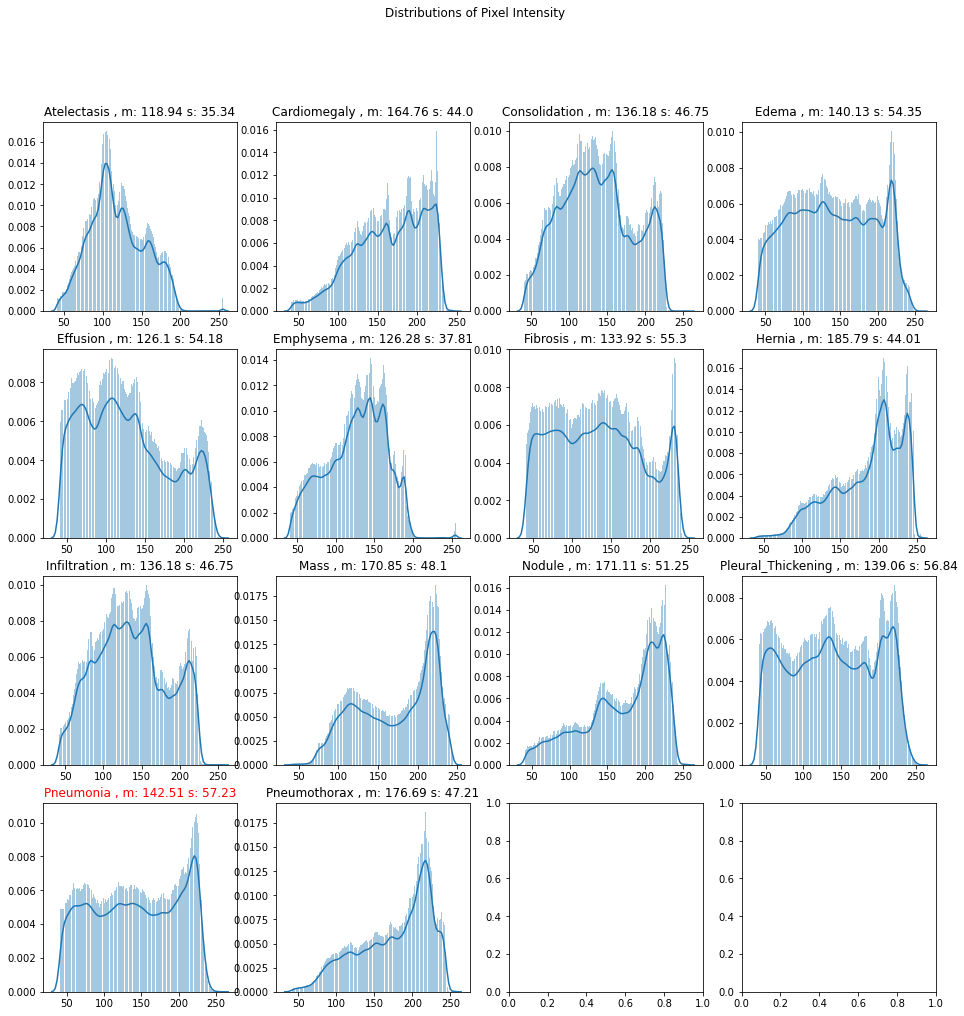

In [76]:
difference = {}
fig, axes = plt.subplots(4, 4, figsize = (16, 16))
fig.suptitle('Distributions of Pixel Intensity')
p = imageio.imread(coll[1]['Pneumonia'])
p = p[p > 40]
pneumonia = np.array(p.ravel())
for ax, label, path in zip(axes.flatten(), coll[1].keys(), coll[1].values()):
    img2 = imageio.imread(path)
    img2 = img2[img2 > 40]
    img2 = img2.ravel()
    sns.distplot(img2, ax=ax, bins=256)
#     diff = abs(pneumonia_arr-np.array(img2)).sum()
#     difference[label] = diff
#     ax.set(title=f'{label} - {diff}')
    if label == 'Pneumonia':
        ax.set_title(f'{label} , m: {round(img2.mean(),2)} s: {round(img2.std(),2)}', color="red")
    else:
        ax.set_title(f'{label} , m: {round(img2.mean(),2)} s: {round(img2.std(),2)}')


Examinig above, the closest three diseases in terms of shape, mean and std (spread), are Edema, Fibrosis and Infiltration

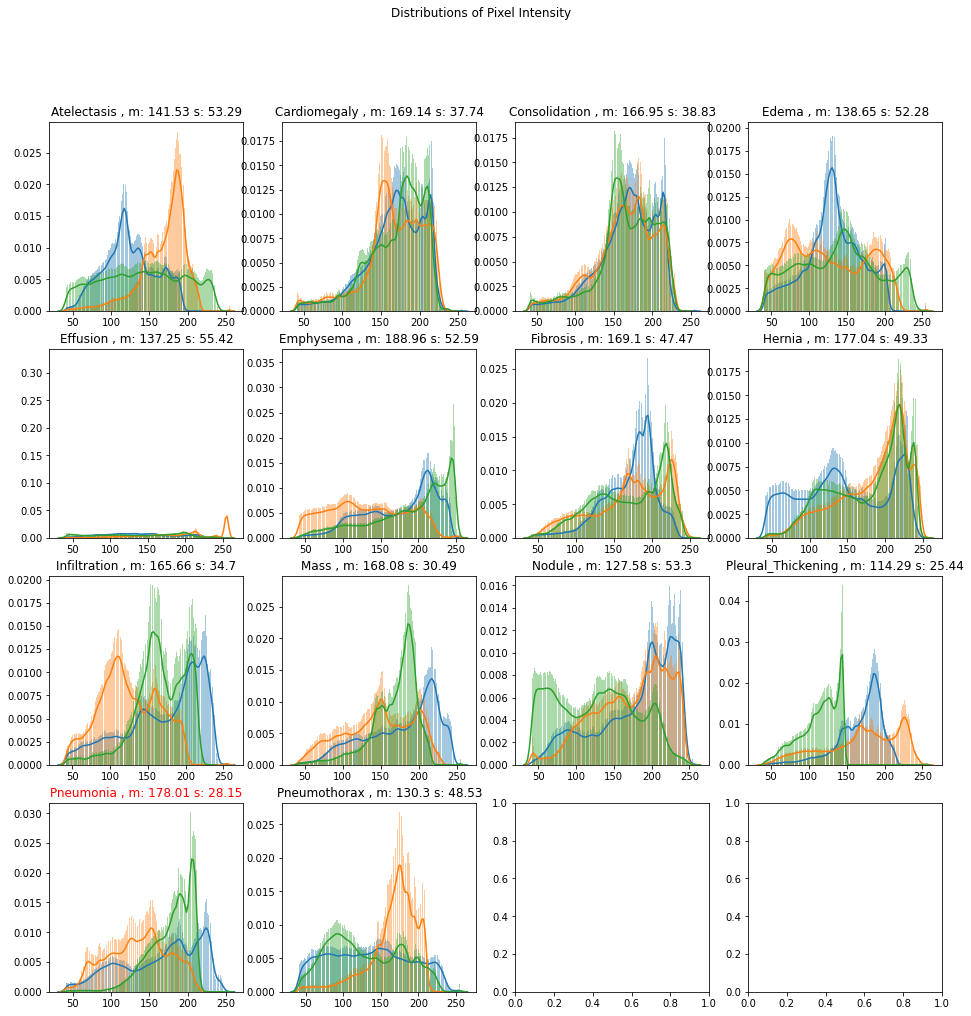

In [79]:
difference = {}
fig, axes = plt.subplots(4, 4, figsize = (16, 16))
fig.suptitle('Distributions of Pixel Intensity')
for i in range(2,5):
    p = imageio.imread(coll[i]['Pneumonia'])
    p = p[p > 40]
    pneumonia = np.array(p.ravel())
    for ax, label, path in zip(axes.flatten(), coll[i].keys(), coll[i].values()):
        img2 = imageio.imread(path)
        img2 = img2[img2 > 40]
        img2 = img2.ravel()
        sns.distplot(img2, ax=ax, bins=256)
    #     diff = abs(pneumonia_arr-np.array(img2)).sum()
    #     difference[label] = diff
    #     ax.set(title=f'{label} - {diff}')
        if label == 'Pneumonia':
            ax.set_title(f'{label} , m: {round(img2.mean(),2)} s: {round(img2.std(),2)}', color="red")
        else:
            ax.set_title(f'{label} , m: {round(img2.mean(),2)} s: {round(img2.std(),2)}')


Plotting all 5 diseases together 

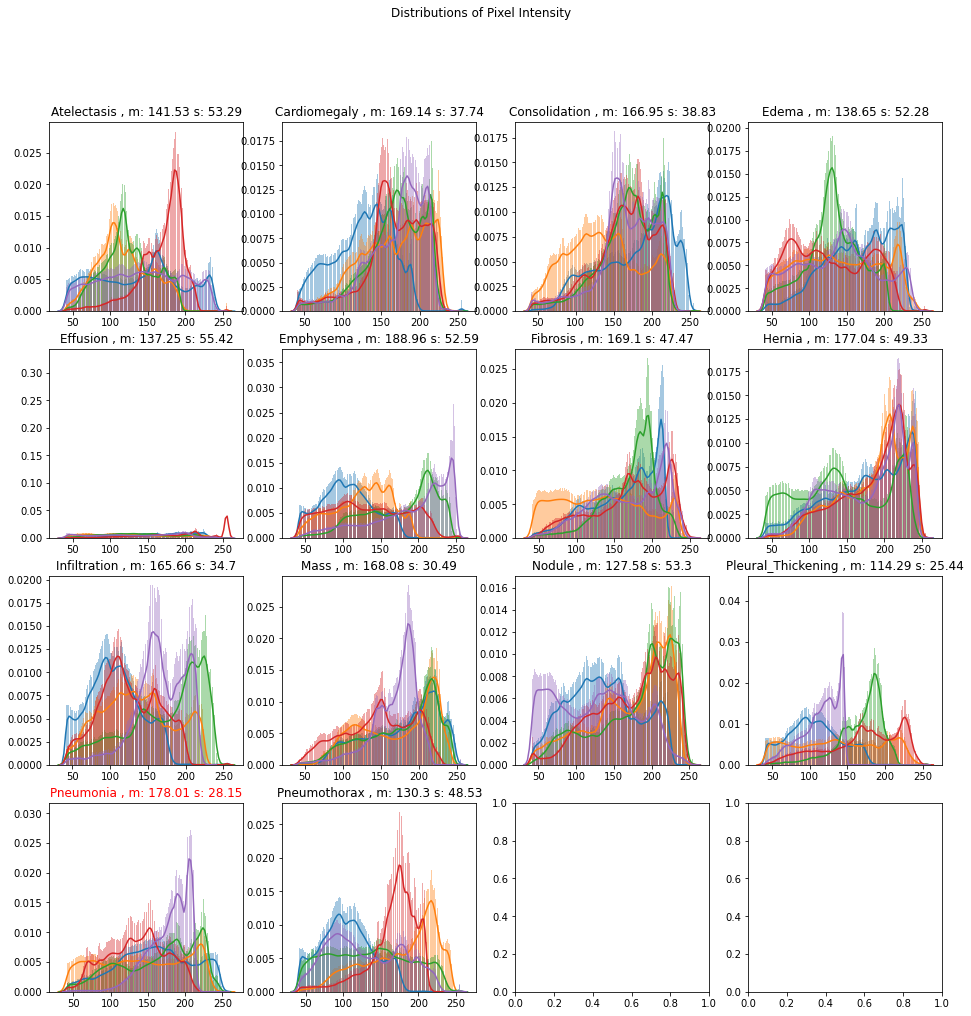

In [89]:
difference = {}
fig, axes = plt.subplots(4, 4, figsize = (16, 16))
fig.suptitle('Distributions of Pixel Intensity')
for i in range(0,5):
    p = imageio.imread(coll[i]['Pneumonia'])
    p = p[p > 40]
    pneumonia = np.array(p.ravel())
    for ax, label, path in zip(axes.flatten(), coll[i].keys(), coll[i].values()):
        img2 = imageio.imread(path)
        img2 = img2[img2 > 40]
        img2 = img2.ravel()
        sns.distplot(img2, ax=ax, bins=256,label = path)
        #plt.legend()
    #     diff = abs(pneumonia_arr-np.array(img2)).sum()
    #     difference[label] = diff
        #ax.set(title=f'{label}')
        if label == 'Pneumonia':
            ax.set_title(f'{label} , m: {round(img2.mean(),2)} s: {round(img2.std(),2)}', color="red")
        else:
            ax.set_title(f'{label} , m: {round(img2.mean(),2)} s: {round(img2.std(),2)}')
        #fig.legend(label)
